# Treinando e executando um modelo linear usando Scikit-Learn

## Descrição dos dados
Os dados utilizados nessa seção são advindos da biblioteca iris

Os dados dessa biblioteca são semelhantes aos dicionários
e possuem chaves e valores.

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import sklearn.linear_model

from sklearn.datasets import load_iris
iris = load_iris()
iris.keys()
iris

{'data': array([[5.1, 3.5, 1.4, 0.2],
        [4.9, 3. , 1.4, 0.2],
        [4.7, 3.2, 1.3, 0.2],
        [4.6, 3.1, 1.5, 0.2],
        [5. , 3.6, 1.4, 0.2],
        [5.4, 3.9, 1.7, 0.4],
        [4.6, 3.4, 1.4, 0.3],
        [5. , 3.4, 1.5, 0.2],
        [4.4, 2.9, 1.4, 0.2],
        [4.9, 3.1, 1.5, 0.1],
        [5.4, 3.7, 1.5, 0.2],
        [4.8, 3.4, 1.6, 0.2],
        [4.8, 3. , 1.4, 0.1],
        [4.3, 3. , 1.1, 0.1],
        [5.8, 4. , 1.2, 0.2],
        [5.7, 4.4, 1.5, 0.4],
        [5.4, 3.9, 1.3, 0.4],
        [5.1, 3.5, 1.4, 0.3],
        [5.7, 3.8, 1.7, 0.3],
        [5.1, 3.8, 1.5, 0.3],
        [5.4, 3.4, 1.7, 0.2],
        [5.1, 3.7, 1.5, 0.4],
        [4.6, 3.6, 1. , 0.2],
        [5.1, 3.3, 1.7, 0.5],
        [4.8, 3.4, 1.9, 0.2],
        [5. , 3. , 1.6, 0.2],
        [5. , 3.4, 1.6, 0.4],
        [5.2, 3.5, 1.5, 0.2],
        [5.2, 3.4, 1.4, 0.2],
        [4.7, 3.2, 1.6, 0.2],
        [4.8, 3.1, 1.6, 0.2],
        [5.4, 3.4, 1.5, 0.4],
        [5.2, 4.1, 1.5, 0.1],
  

A chave DESCR traz uma breve descrição dos dados

A chave target_names é um array de strings contendo as 
especies de flores que vamos prever.

A chave feature_names é uma lista de string informando a
 espécie de cada recurso.

In [2]:
print(iris['DESCR'][:193] + "\n...")

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, pre
...


In [3]:
iris['target_names']

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [4]:
iris['feature_names']

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

A seguir, temos os valores das características para as cinco 
primeiras amostras.

In [5]:
iris['data'][:5]

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

Existem três espécies de flores nos dados as quais são 
descritas por inteiros entre 0 e 2.

In [6]:
iris['target']

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

# Treinando e testando os dados
Vamos usar machine learning aplicado a esses dados para prever o tipo 
de flor. 

Infelizmente, não podemos usar os dados que usamos para construir o modelo para avaliá-lo. Isso ocorre porque nosso modelo sempre pode se lembrar de todo o conjunto de treinamento e, portanto, sempre prediz o rótulo correto para qualquer ponto do conjunto de treinamento. Essa “lembrança” não indica para nós se nosso modelo se generalizará bem, ou seja, se também terá um bom desempenho em novos dados. Portanto, antes de aplicarmos nosso modelo a novas medições, queremos saber se podemos confiar em suas previsões.

Para avaliar o desempenho dos modelos, mostramos ao modelo 
novos dados (que nunca foram vistos antes) para os quais temos
 rótulos. Isso geralmente é feito dividindo os dados rotulados 
 que coletamos (aqui nossas 150 medições de flores) em duas 
 partes.

A parte dos dados é usada para criar nosso modelo de aprendizado
 de máquina e é chamada de dados de treinamento ou conjunto
 de treinamento. O restante dos dados será usado para acessar
 o quão bem o modelo funciona e é chamado de dados de teste,
  conjunto de testes ou conjunto de retenção.
  
  O Scikit-learn contém uma função que embaralha o conjunto
  de dados e o divide para você, a função train_test_split.
  Essa função extrai 75% das linhas nos dados como o conjunto
  de treinamento, juntamente com os rótulos correspondentes
  para esses dados. Os 25% restantes dos dados, juntamente
  com os rótulos restantes, são declarados como o conjunto
  de testes.
  
  Geralmente usamos um X maiúsculo para indicar os dados e 
  uma letra minúscula para os rótulos.

  

In [7]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
random_state=0)

X_train contém 75% das observações da base de dados enquanto
X_test contém 25% das observações

Antes de proceder o modelo vamos fazer uma análise gráfica dos dados
para identificar possíveis erros nos dados.

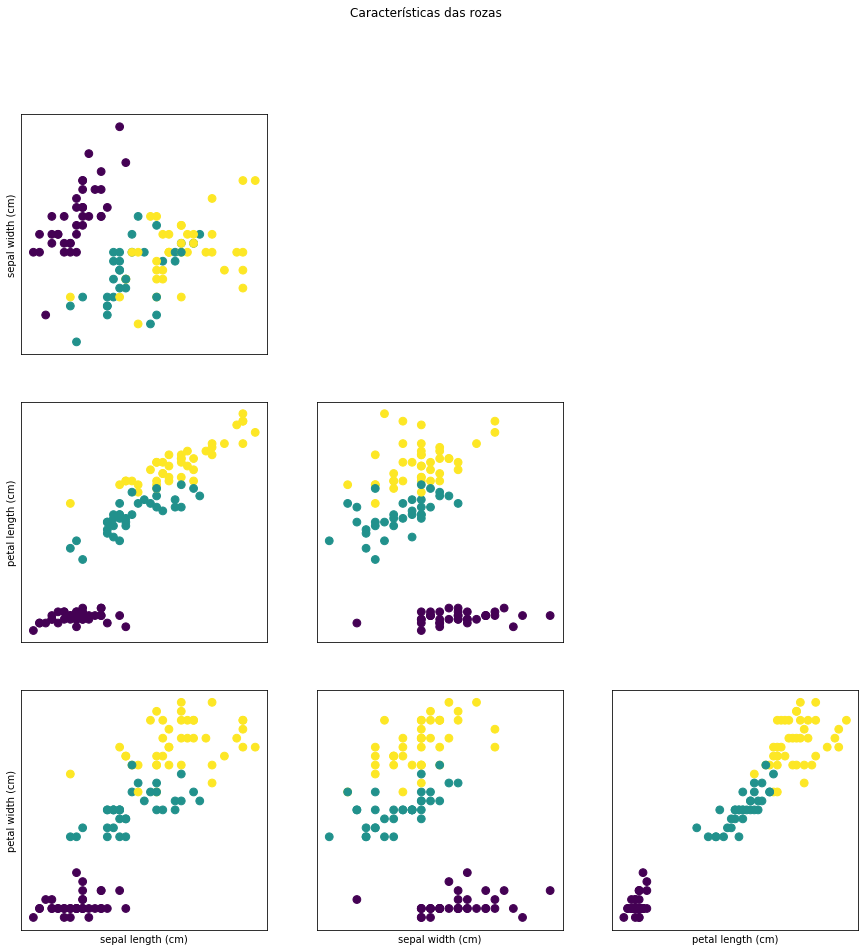

In [8]:

fig, ax = plt.subplots(3, 3, figsize=(15, 15))
plt.suptitle("Características das rozas")
for i in range(3):
    for j in range(3):
        ax[i, j].scatter(X_train[:, j], X_train[:, i + 1], c=y_train, s=60)
        ax[i, j].set_xticks(())
        ax[i, j].set_yticks(())
        if i == 2:
            ax[i, j].set_xlabel(iris['feature_names'][j])
        if j == 0:
            ax[i, j].set_ylabel(iris['feature_names'][i + 1])
        if j > i:
            ax[i, j].set_visible(False)
            

# Modelo básico (KNN)

Existem vários algoritmos skit_learning para construção de 
modelos de aprendizado de maquinas. Aqui vamos usar inicialmente
o algoritmo do vizinho mais próximo.
Para fazer uma previsão para um novo ponto de dados, este 
algoritmo localiza o ponto no conjunto de dados de treinamento
próximo ao novo ponto e em seguida atribui o rótulo desse ponto
de treinamento mais próximo ao novo ponto de dados, podendo considerar
mais de um vizinho (k = 1, 2, 3, ...).

Vamos fazer uso da função KNeighborsClassifier.

Antes de partir para a efetuação do modelo, precisamos identificar
quais parâmetros iremos usar. No método knn, o único parâmetro
que usamos é o número de vizinhos.

In [9]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)

Para construir o modelo no conjunto de treinamento, chamamos o
método de ajuste do objeto knn (knn.fit), que usa como argumentos a matriz
numpy X_train que contém os dados de treinamento e a matriz numpy
y_train dos rótulos de treinamento correspondentes:
    

In [10]:
knn.fit(X_train, y_train)
KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=1, p=2, weights='uniform')

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=1, n_neighbors=1, p=2,
                     weights='uniform')

Nesse caso os componentes da função são:

##### Algorithm
É o algoritmo usado para computar os vizinhos próximos

Quando é atribuído o valor "auto", o software tentará decidir
o algoritmo mais apropriado com base nos valores passados
para ajustar o método. 

Também pode assumir os valores ‘ball_tree’, ‘kd_tree’ ou 'brute.

##### leaf_size
possui defull = 30 e deve pode mudar de acordo com a natureza
do problema.

##### metric
a métrica da distância a ser usada na árvore.
A métrica padrão é minkowski, e com p = 2 é equivalente
à métrica euclidiana padrão. 

#####metric_params
Possui defull = none e é uma funcionalidade adicional da função
metric aplicada aos parâmetros.

##### n_jobs
Assume valores inteiros ou none.
Se refere ao número de tarefas paralelas executadas na busca
pelos vizinhos.

##### n_neighbors
Número de vizinhos utilizados.

##### p
Assume valores inteiros e possui defull = 2

Se refere à distância métrica na qual um determinado ponto pode ou
não ser considerado como vizinho de um ponto objetivo.

##### weights
defull = uniform
Diz respeito à ponderação dos pontos vizinhos de acordo com a sua
distância do ponto objetivo.

# Fazendo predições

Imagine que encontramos uma íris na natureza com um comprimento
de sépala de 5 cm, uma largura de sépala de 2,9 cm,
um comprimento de pétala de 1 cm e uma largura de pétala de 0,2 cm.
 Que espécie de íris seria essa?

Podemos colocar esses dados em uma matriz numpy, novamente com
o número da forma de amostras (uma) vezes o número de recursos
(quatro):

In [11]:
X_new = np.array([[5, 2.9, 1, 0.2]])
X_new.shape

(1, 4)

Para fazer a predição usamos a função knn.predict

In [12]:
prediction = knn.predict(X_new)
prediction
iris['target_names'][prediction]

array(['setosa'], dtype='<U10')

Nosso modelo prevê que essa nova íris pertence à classe 0,
ou seja, sua espécie é Setosa

## Avaliando o modelo

Essa fase consiste eum fazer uma previsão na base de tesete e
comparar com o seu rótulo (espécie conhecida)

In [13]:
y_pred = knn.predict(X_test)
np.mean(y_pred == y_test)

0.9736842105263158

também é possível usar o método de ponderação do objeto knn,
que informará a acurácia (precisão) do conjunto de testes.

In [14]:
knn.score(X_test, y_test)

0.9736842105263158

que retornará o valor de 0.97368421052631582

o que indica que a previsão foi feita corretamente para 97% das
flores, indicando que o modelo está correto em 97% das veses.

##Resumo
 O código pode ser resumido em:
 
 #### Treinamento
 
 X_train, X_test, y_train, y_test = train_test_split(iris['data'], iris['target'],
random_state=0)

#### Classificação
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train)

#### Acurácia
knn.score(X_test, y_test)
 

